In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
toxic = pd.read_csv('train.csv')

In [101]:
toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [102]:
toxic.shape

(159571, 8)

In [103]:
toxic = toxic.set_index('id')

In [104]:
toxic.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,,
0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [105]:
toxic['text length'] = toxic['comment_text'].apply(len)

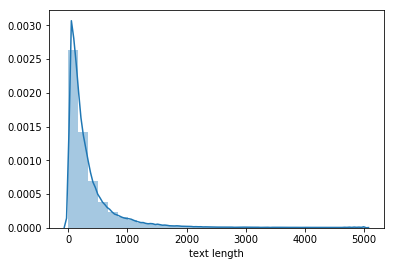

In [106]:
sns.distplot(a=toxic['text length'],bins=30)

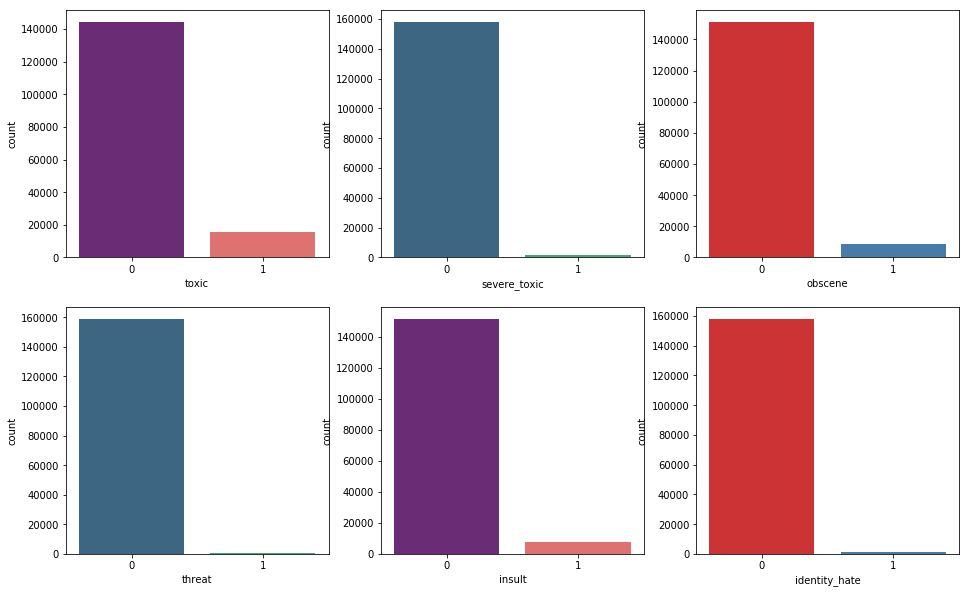

In [107]:
fig,ax = plt.subplots(2,3,figsize=(16,10))
ax1,ax2,ax3,ax4,ax5,ax6 = ax.flatten()
sns.countplot(toxic['toxic'],palette= 'magma',ax=ax1)
sns.countplot(toxic['severe_toxic'], palette= 'viridis',ax=ax2)
sns.countplot(toxic['obscene'], palette= 'Set1',ax=ax3)
sns.countplot(toxic['threat'], palette= 'viridis',ax = ax4)
sns.countplot(toxic['insult'], palette = 'magma',ax=ax5)
sns.countplot(toxic['identity_hate'], palette = 'Set1', ax = ax6)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA0A8B0C18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001FA19CD6E48>], dtype=object)

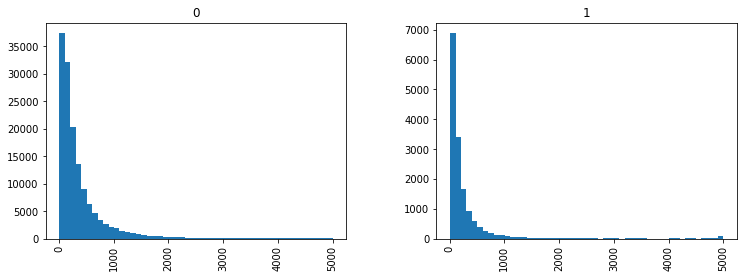

In [108]:
toxic.hist(column='text length', by='toxic', bins=50,figsize=(12,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA19D317F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001FA0F7C87B8>], dtype=object)

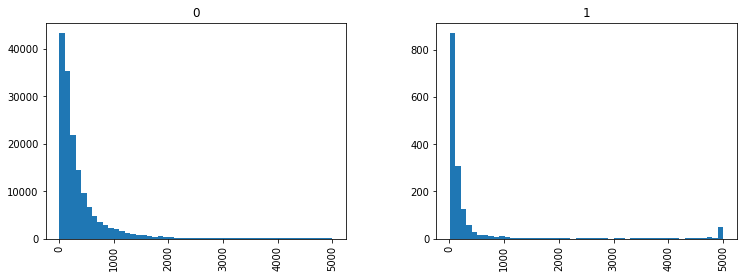

In [109]:
toxic.hist(column='text length', by='severe_toxic', bins=50,figsize=(12,4))

In [110]:
toxic['comment_text'].fillna("unknown", inplace=True)

In [111]:
from nltk.corpus import stopwords

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [113]:
tfidf_vec = TfidfVectorizer(max_df=0.7,stop_words='english')

In [114]:
X = toxic['comment_text']

In [115]:
y = toxic['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_toxic = LogisticRegression()
log_toxic.fit(X_train_vec,y_train)

predictions = log_toxic.predict(X_test_vec)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[47327   249]
 [ 2177  2906]]
             precision    recall  f1-score   support

          0       0.96      0.99      0.98     47576
          1       0.92      0.57      0.71      5083

avg / total       0.95      0.95      0.95     52659



In [116]:
y = toxic['severe_toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_stoxic = LogisticRegression()
log_stoxic.fit(X_train_vec,y_train)

predictions = log_stoxic.predict(X_test_vec)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[52054    79]
 [  396   130]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     52133
          1       0.62      0.25      0.35       526

avg / total       0.99      0.99      0.99     52659



In [117]:
y = toxic['obscene']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_obscene = LogisticRegression()
log_obscene.fit(X_train_vec,y_train)

predictions = log_obscene.predict(X_test_vec)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[49688   140]
 [ 1131  1700]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     49828
          1       0.92      0.60      0.73      2831

avg / total       0.97      0.98      0.97     52659



In [118]:
y = toxic['threat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_threat = LogisticRegression()
log_threat.fit(X_train_vec,y_train)

predictions = log_threat.predict(X_test_vec)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[52498     9]
 [  130    22]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     52507
          1       0.71      0.14      0.24       152

avg / total       1.00      1.00      1.00     52659



In [119]:
y = toxic['insult']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_insult = LogisticRegression()
log_insult.fit(X_train_vec,y_train)

predictions = log_insult.predict(X_test_vec)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[49746   270]
 [ 1377  1266]]
             precision    recall  f1-score   support

          0       0.97      0.99      0.98     50016
          1       0.82      0.48      0.61      2643

avg / total       0.97      0.97      0.96     52659



In [120]:
y = toxic['identity_hate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_ihate = LogisticRegression()
log_ihate.fit(X_train_vec,y_train)

predictions = log_ihate.predict(X_test_vec)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[52158    30]
 [  401    70]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     52188
          1       0.70      0.15      0.25       471

avg / total       0.99      0.99      0.99     52659



In [121]:
test = pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [122]:
test1 = test['comment_text']
test1_vec = tfidf_vec.transform(test1)

In [123]:
prob_toxic = log_toxic.predict_proba(test1_vec)
prob_stoxic = log_stoxic.predict_proba(test1_vec)
prob_obscene = log_obscene.predict_proba(test1_vec)
prob_threat = log_obscene.predict_proba(test1_vec)
prob_insult = log_insult.predict_proba(test1_vec)
prob_ihate = log_ihate.predict_proba(test1_vec)

In [124]:
df1 = pd.DataFrame(prob_toxic[:,1],columns={'toxic'})
df2 = pd.DataFrame(prob_stoxic[:,1],columns={'severe_toxic'})
df3 = pd.DataFrame(prob_obscene[:,1],columns={'obscene'})
df4 = pd.DataFrame(prob_threat[:,1],columns={'threat'})
df5 = pd.DataFrame(prob_insult[:,1],columns={'insult'})
df6 = pd.DataFrame(prob_ihate[:,1],columns={'identity_hate'})

In [125]:
df7 = pd.concat([test['id'],df1,df2,df3,df4,df5,df6],axis=1)

In [126]:
df7.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.989512,0.143797,0.984705,0.984705,0.883194,0.177408
1,0000247867823ef7,0.011960,0.003285,0.009966,0.009966,0.009700,0.004238
2,00013b17ad220c46,0.048881,0.005101,0.020630,0.020630,0.024505,0.005992
3,00017563c3f7919a,0.003571,0.002043,0.003310,0.003310,0.003604,0.001363
4,00017695ad8997eb,0.042637,0.002621,0.012559,0.012559,0.013874,0.003086


In [127]:
df7.set_index('id',inplace=True)

In [128]:
df7.to_csv(path_or_buf='submission.csv')

In [129]:
df7.shape

(153164, 6)